# Capstone Project 1 by Sai Ajit PGA 36

# Dataset Information

Content
This dataset has funding information of the Indian startups from January 2015 to 2020. It includes columns with the date funded, the city the startup is based out of, the names of the founders, and the amount invested (in USD).

Predictive modeling using data from Indian startup funding involves leveraging statistical and machine learning techniques to analyze historical trends and patterns in the funding landscape of startups in India. This data-driven approach aims to uncover insights that can be used to make informed predictions about future funding scenarios for emerging businesses.

The process begins with the collection and comprehensive analysis of a diverse range of data points related to startup funding in India. This may include information such as funding amounts, funding rounds, industry sectors, geographic locations, investor profiles, and success metrics. The dataset is then cleaned, organized, and preprocessed to ensure accuracy and relevance.

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Indian_startup_funding_2023.csv')
df

,S.No,Date dd/mm/yyyy,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,Investment Type,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,"General Atlantic, Prosus, Peak XV, Sofina, Cha...",Private Equity Round,"40,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"1,00,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"3,83,58,860",NaN
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [4]:
df['Startup Name'].shape

(3044,)

In [5]:
sorted(df['Startup Name'].unique().tolist())

['"BYJU\\\\\'S"',
 '#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Air

In [6]:
df.rename(columns={
    'Date dd/mm/yyyy':'Date',
    'Startup Name':'Startups',
    'Industry Vertical':'Industry Vertical',
    'Sub Vertical':'Sub Vertical',
    'City  Location':'City',
    'Investors Name':'Investors',
    'Investment Type':'Round',
    'Amount in USD':'Amount'
    
},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S.No               3044 non-null   int64 
 1   Date               3044 non-null   object
 2   Startups           3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   Sub Vertical       2108 non-null   object
 5   City               2864 non-null   object
 6   Investors          3020 non-null   object
 7   Round              3040 non-null   object
 8   Amount             2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


#### Convert Amount to Cr

In [8]:
df['Amount']=df['Amount'].fillna('0')

In [9]:
df

,S.No,Date,Startups,Industry Vertical,Sub Vertical,City,Investors,Round,Amount,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,"General Atlantic, Prosus, Peak XV, Sofina, Cha...",Private Equity Round,"40,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"1,00,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"3,83,58,860",NaN
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0,"Strategic Funding, Minority stake"


In [10]:
df['Amount']=df['Amount'].str.replace(',','')

In [11]:
df['Amount']=df['Amount'].str.replace('Undisclosed','0')
df['Amount']=df['Amount'].str.replace('unknown','0')
df['Amount']=df['Amount'].str.replace('undisclosed','0')

In [12]:
df['Amount']=df['Amount'].str.replace('+','')

In [13]:
df=df[df['Amount'].str.isdigit()]

In [14]:
df['Amount']=df['Amount'].astype('float')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3030 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               3030 non-null   int64  
 1   Date               3030 non-null   object 
 2   Startups           3030 non-null   object 
 3   Industry Vertical  2859 non-null   object 
 4   Sub Vertical       2105 non-null   object 
 5   City               2850 non-null   object 
 6   Investors          3006 non-null   object 
 7   Round              3028 non-null   object 
 8   Amount             3030 non-null   float64
 9   Remarks            415 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 260.4+ KB


In [16]:
df.head()

,S.No,Date,Startups,Industry Vertical,Sub Vertical,City,Investors,Round,Amount,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,"General Atlantic, Prosus, Peak XV, Sofina, Cha...",Private Equity Round,400000000.0,NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,10048394.0,NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,38358860.0,NaN
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN


### Convert Dollar to INR

In [17]:
def to_inr(dollar):
    inr = dollar*83.38
    return inr/10000000

In [18]:
df['Amount'] = df['Amount'].apply(to_inr)

In [19]:
df['Date'] = df['Date'].str.replace('05/072018','05-07-2018')

In [20]:
df

,S.No,Date,Startups,Industry Vertical,Sub Vertical,City,Investors,Round,Amount,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,"General Atlantic, Prosus, Peak XV, Sofina, Cha...",Private Equity Round,3335.200000,NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,83.783509,NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,319.836175,NaN
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.014000,NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.008400,NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,37.521000,NaN
3040,3041,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,6.878850,Govt backed VC Fund
3041,3042,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,12.507000,NaN
3042,3043,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0.000000,"Strategic Funding, Minority stake"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3030 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               3030 non-null   int64  
 1   Date               3030 non-null   object 
 2   Startups           3030 non-null   object 
 3   Industry Vertical  2859 non-null   object 
 4   Sub Vertical       2105 non-null   object 
 5   City               2850 non-null   object 
 6   Investors          3006 non-null   object 
 7   Round              3028 non-null   object 
 8   Amount             3030 non-null   float64
 9   Remarks            415 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 260.4+ KB


In [22]:
df.head()

,S.No,Date,Startups,Industry Vertical,Sub Vertical,City,Investors,Round,Amount,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,"General Atlantic, Prosus, Peak XV, Sofina, Cha...",Private Equity Round,3335.200000,NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,83.783509,NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,319.836175,NaN
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.014000,NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.008400,NaN


In [23]:
df

,S.No,Date,Startups,Industry Vertical,Sub Vertical,City,Investors,Round,Amount,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,"General Atlantic, Prosus, Peak XV, Sofina, Cha...",Private Equity Round,3335.200000,NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,83.783509,NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,319.836175,NaN
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.014000,NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.008400,NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,37.521000,NaN
3040,3041,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,6.878850,Govt backed VC Fund
3041,3042,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,12.507000,NaN
3042,3043,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0.000000,"Strategic Funding, Minority stake"


In [24]:
df.isnull().sum()

S.No                    0
Date                    0
Startups                0
Industry Vertical     171
Sub Vertical          925
City                  180
Investors              24
Round                   2
Amount                  0
Remarks              2615
dtype: int64

In [25]:
df['Round']=df['Round'].fillna('Unknown')

In [26]:
df.isnull().sum()

S.No                    0
Date                    0
Startups                0
Industry Vertical     171
Sub Vertical          925
City                  180
Investors              24
Round                   0
Amount                  0
Remarks              2615
dtype: int64

In [27]:
df['Industry Vertical']=df['Industry Vertical'].fillna('Unknown')

In [28]:
df['Sub Vertical']=df['Sub Vertical'].fillna('Unknown')

In [29]:
df['City']=df['City'].fillna('Unknown')

In [30]:
df['Investors']=df['Investors'].fillna('Unknown')

In [31]:
df['Remarks']=df['Remarks'].fillna('Unknown')

In [32]:
df.isnull().sum()

S.No                 0
Date                 0
Startups             0
Industry Vertical    0
Sub Vertical         0
City                 0
Investors            0
Round                0
Amount               0
Remarks              0
dtype: int64

In [33]:
columns_list=df.columns
columns_list

Index(['S.No', 'Date', 'Startups', 'Industry Vertical', 'Sub Vertical', 'City',
       'Investors', 'Round', 'Amount', 'Remarks'],
      dtype='object')

In [34]:
for i in columns_list:
    print(i," : \n",df[i].unique())
    print("***\n")

S.No  : 
 [   1    2    3 ... 3042 3043 3044]
***

Date  : 
 ['09-01-2020' '13-01-2020' '02-01-2020' ... '29-01-2015' '30-01-2015'
 '31-01-2015']
***

Startups  : 
 ['BYJU’S' 'Shuttl' 'Mamaearth' ... 'Graphene' 'Simplotel'
 'couponmachine.in']
***

Industry Vertical  : 
 ['E-Tech' 'Transportation' 'E-commerce' 'FinTech' 'Fashion and Apparel'
 'Logistics' 'Hospitality' 'Technology' 'E-Commerce' 'Aerospace'
 'B2B-focused foodtech startup' 'Finance' 'Video' 'Gaming' 'Software'
 'Health and wellness' 'Education' 'Food and Beverage'
 'Health and Wellness' 'B2B Marketing' 'Video Games' 'SaaS'
 'Last Mile Transportation' 'Healthcare' 'Customer Service' 'B2B'
 'Consumer Goods' 'Advertising, Marketing' 'IoT' 'Information Technology'
 'Consumer Technology' 'Accounting' 'Retail' 'Customer Service Platform'
 'Automotive' 'EdTech' 'Services' 'Compliance' 'Transport'
 'Artificial Intelligence' 'Tech' 'Health Care' 'Luxury Label'
 'Waste Management Service' 'Deep-Tech' 'Energy' 'Digital Media' 'Saas'

In [35]:
df['Industry Vertical'] = df['Industry Vertical'].replace('WiFi \\xe2\\x80\\x93 first Cloud communication platform', 'WiFi – first Cloud communication platform')

In [36]:
df['Industry Vertical'].value_counts(ascending=False)

Industry Vertical
Consumer Internet                          941
Technology                                 478
eCommerce                                  186
Unknown                                    171
Healthcare                                  70
                                          ... 
Home Cooked Food marketplace & Delivery      1
Gesture based Mobile Development             1
Hotel Mobile CRM Software platform           1
Rental Accommodation Search platform         1
Hyperlocal Delivery Services                 1
Name: count, Length: 811, dtype: int64

In [37]:
# Replace the incorrect string
df['Industry Vertical'] = df['Industry Vertical'].str.replace('Hyperlocal\\\\xc2\\\\xa0 Grocery Delivery Service', 'Hyperlocal Grocery Delivery Service')


In [38]:
df['Industry Vertical'] = df['Industry Vertical'].str.replace('Mobile Growth Hacking\\\\nPlatform','Mobile Growth Hacking Platform')

In [39]:
df['Industry Vertical'] = df['Industry Vertical'].str.replace('Women Ethnic Wear\\\\xc2\\\\xa0 Online Marketplace', 'Women Ethnic Wear Online Marketplace')

In [40]:
df['Industry Vertical'] = df['Industry Vertical'].replace('Location based Nightlife recommendation\\\\xc2\\\\xa0 Platform', 'Location based Nightlife recommendation Platform')

In [41]:
df['Industry Vertical'] = df['Industry Vertical'].replace('Luxury goods\\\\xc2\\\\xa0 Shopping Platform', 'Luxury goods Shopping Platform')

In [42]:
df['Industry Vertical'] = df['Industry Vertical'].replace('ECommerce Brands\\\\xe2\\\\x80\\\\x99 Full Service Agency', 'ECommerce Brands Full Service Agency')

In [43]:
df['Industry Vertical'] = df['Industry Vertical'].replace('Home Design & D\\\\xc3\\\\xa9cor platform', 'Home Design & platform')

In [44]:
df['Industry Vertical'] = df['Industry Vertical'].replace('Chain of Tea Caf\\\\xc3\\\\xa9\\\\xe2\\\\x80\\\\x99s', 'Chain of Tea Cafe')

In [45]:
df['Industry Vertical'] = df['Industry Vertical'].replace('App security\\\\xc2\\\\xa0 testing platform', 'App security testing platform')

In [46]:
df['Industry Vertical'] = df['Industry Vertical'].replace('Home Design & D\\\\xc3\\\\xa9cor solutions', 'Home Design & solutions')

In [47]:
df['Industry Vertical'] = df['Industry Vertical'].replace('Online home d\\\\xc3\\\\xa9cor marketplace', 'Online home marketplace')

In [48]:
df['Industry Vertical'] = df['Industry Vertical'].replace('Healthcare\\\\nService provider', 'Healthcare Service provider')

In [49]:
df['Industry Vertical'] = df['Industry Vertical'].replace('Online Home D\\\\xc3\\\\xa9cor', 'Online Home')

In [50]:
df['Industry Vertical'] = df['Industry Vertical'].replace('Online Furnishing\\\\neCommerce', 'Online Furnishing Commerce')

In [51]:
df['Industry Vertical'] = df['Industry Vertical'].replace('Interactive\\\\xc2\\\\xa0 How-To Guides', 'Interactive How-To Guides')

In [52]:
df['Industry Vertical'] = df['Industry Vertical'].replace('OnDemand\\\\nMobile Handyman Services', 'OnDemand Mobile Handyman Services')

In [53]:
df['Round'] = df['Round'].replace('Seed\\\\nFunding', 'Seed Funding')

In [54]:
df['Round'] = df['Round'].replace('Private\\\\nEquity', 'Private Equity')

In [55]:
df['Remarks'] = df['Remarks'].replace('Series (More here)', 'Series C (More here)')

In [56]:
for i in columns_list:
    print(i," : \n",df[i].unique())
    print("***\n")

S.No  : 
 [   1    2    3 ... 3042 3043 3044]
***

Date  : 
 ['09-01-2020' '13-01-2020' '02-01-2020' ... '29-01-2015' '30-01-2015'
 '31-01-2015']
***

Startups  : 
 ['BYJU’S' 'Shuttl' 'Mamaearth' ... 'Graphene' 'Simplotel'
 'couponmachine.in']
***

Industry Vertical  : 
 ['E-Tech' 'Transportation' 'E-commerce' 'FinTech' 'Fashion and Apparel'
 'Logistics' 'Hospitality' 'Technology' 'E-Commerce' 'Aerospace'
 'B2B-focused foodtech startup' 'Finance' 'Video' 'Gaming' 'Software'
 'Health and wellness' 'Education' 'Food and Beverage'
 'Health and Wellness' 'B2B Marketing' 'Video Games' 'SaaS'
 'Last Mile Transportation' 'Healthcare' 'Customer Service' 'B2B'
 'Consumer Goods' 'Advertising, Marketing' 'IoT' 'Information Technology'
 'Consumer Technology' 'Accounting' 'Retail' 'Customer Service Platform'
 'Automotive' 'EdTech' 'Services' 'Compliance' 'Transport'
 'Artificial Intelligence' 'Tech' 'Health Care' 'Luxury Label'
 'Waste Management Service' 'Deep-Tech' 'Energy' 'Digital Media' 'Saas'

In [57]:
df

,S.No,Date,Startups,Industry Vertical,Sub Vertical,City,Investors,Round,Amount,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,"General Atlantic, Prosus, Peak XV, Sofina, Cha...",Private Equity Round,3335.200000,Unknown
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,83.783509,Unknown
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,319.836175,Unknown
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.014000,Unknown
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.008400,Unknown
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29-01-2015,Printvenue,Unknown,Unknown,Unknown,Asia Pacific Internet Group,Private Equity,37.521000,Unknown
3040,3041,29-01-2015,Graphene,Unknown,Unknown,Unknown,KARSEMVEN Fund,Private Equity,6.878850,Govt backed VC Fund
3041,3042,30-01-2015,Mad Street Den,Unknown,Unknown,Unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,12.507000,Unknown
3042,3043,30-01-2015,Simplotel,Unknown,Unknown,Unknown,MakeMyTrip,Private Equity,0.000000,"Strategic Funding, Minority stake"


In [283]:
df.to_csv('Indian Startup Funding 2023 Cleaned Data.csv')

In [286]:
df2=pd.read_csv('Indian Startup Funding 2023 Cleaned Data (2).csv')
df2

,S.No,Date,Startups,Industry Vertical,Sub Vertical,City,Investors,Round,Amount,Remarks
0,1,09-01-2020,BYJU'S,E-Tech,E-learning,Bengaluru,"General Atlantic, Prosus, Peak XV, Sofina, Cha...",Private Equity Round,3335.200000,Unknown
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,83.783509,Unknown
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,319.836175,Unknown
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.014000,Unknown
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.008400,Unknown
...,...,...,...,...,...,...,...,...,...,...
3025,3040,29-01-2015,Printvenue,Unknown,Unknown,Unknown,Asia Pacific Internet Group,Private Equity,37.521000,Unknown
3026,3041,29-01-2015,Graphene,Unknown,Unknown,Unknown,KARSEMVEN Fund,Private Equity,6.878850,Govt backed VC Fund
3027,3042,30-01-2015,Mad Street Den,Unknown,Unknown,Unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,12.507000,Unknown
3028,3043,30-01-2015,Simplotel,Unknown,Unknown,Unknown,MakeMyTrip,Private Equity,0.000000,"Strategic Funding, Minority stake"


## Exploratory Data Analysis

In [287]:
df2[df2['Investors'].str.contains('IDG Ventures')].head()

,S.No,Date,Startups,Industry Vertical,Sub Vertical,City,Investors,Round,Amount,Remarks
98,102,13-04-2019,Tripoto,Social Media,Travel,New Delhi,"Orchid India, Hornbill Orchid India Fund, Chir...",Series B,29.944885,Unknown
219,223,30-07-2018,Cure Fit,Consumer Internet,Health and fitness Platform,Bengaluru,"IDG Ventures, Accel Partners, Kalaari Capital ...",Private Equity,1000.560000,Unknown
255,259,02-05-2018,Bizongo,Consumer Internet,Aggregator For Packaging Material,Mumbai,"B Capital, International Finance Corporation (...",Private Equity,183.436000,Unknown
306,310,26-04-2018,POPxo,Technology,Women Focussed Digital Media Platform,Delhi,"Neoplux, OPPO, IDG Ventures India, Kalaari Cap...",Private Equity,45.859000,Unknown
435,439,07-12-2017,eShakti,Ecommerce,"Women's Fashion Clothing Online Platform""",Chennai,IDG Ventures,Debt Funding,19.177400,Unknown


In [289]:
df2[df2['Investors'].str.contains('IDG Ventures')].head()[['Date','Startups','City','Round','Amount']]

,Date,Startups,City,Round,Amount
98,13-04-2019,Tripoto,New Delhi,Series B,29.944885
219,30-07-2018,Cure Fit,Bengaluru,Private Equity,1000.560000
255,02-05-2018,Bizongo,Mumbai,Private Equity,183.436000
306,26-04-2018,POPxo,Delhi,Private Equity,45.859000
435,07-12-2017,eShakti,Chennai,Debt Funding,19.177400


In [291]:
df2[df2['Investors'].str.contains('IDG Ventures')].groupby('Startups')['Amount'].sum().sort_values(ascending=False)

Startups
Cure Fit                 1000.560000
Lenskart                  500.280000
Bizongo                   208.450000
CureFit                   208.450000
Curefit                   125.070000
Vserv                     125.070000
Fintellix                 125.070000
Xpressbees                104.225000
FirstCry.com               83.380000
Uniphore                   73.374400
POPxo                      71.706800
Aasaanjobs                 54.197000
HealthifyMe                50.028000
CloudCherry                50.028000
Sigtuple                   48.360400
Tripoto                    46.620885
Flyrobe                    44.191400
RentMojo                   41.690000
Vayana                     33.352000
PlaySimple                 33.352000
Agrostar                   33.352000
Blowhorn                   30.433700
Active.ai                  25.014000
MyNoticePeriod             25.014000
Heckyl                     22.512600
CreditMantri               20.845000
eShakti                    19

<Axes: ylabel='Amount'>

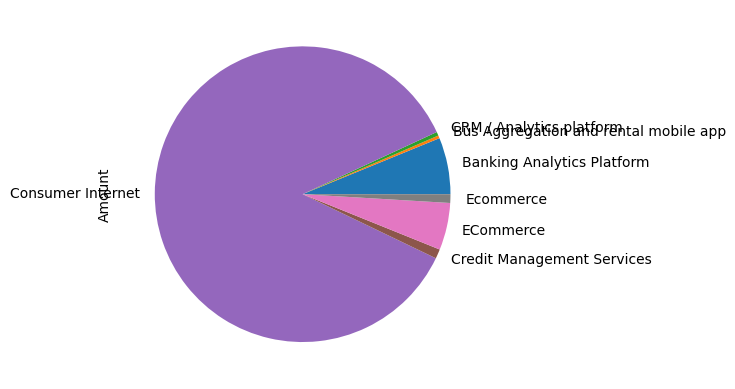

In [292]:
df2[df2['Investors'].str.contains('IDG Ventures')].groupby('Industry Vertical')['Amount'].sum().head(8).plot(kind='pie')

<Axes: ylabel='Amount'>

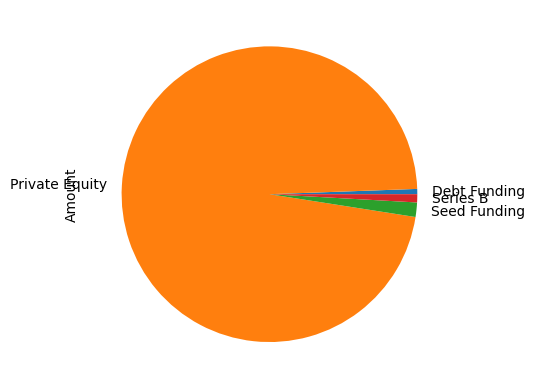

In [293]:
df2[df2['Investors'].str.contains('IDG Ventures')].groupby('Round')['Amount'].sum().head(8).plot(kind='pie')

<Axes: ylabel='Amount'>

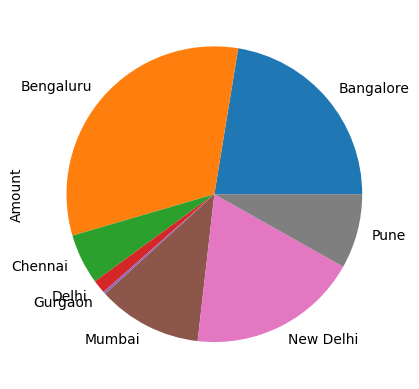

In [294]:
df2[df2['Investors'].str.contains('IDG Ventures')].groupby('City')['Amount'].sum().head(8).plot(kind='pie')

In [212]:
df2.head()

,S.No,Date,Startups,Industry Vertical,Sub Vertical,City,Investors,Round,Amount in Crores,Remarks
0,1,09-01-2020,BYJU'S,E-Tech,E-learning,Bengaluru,"General Atlantic, Prosus, Peak XV, Sofina, Cha...",Private Equity Round,3335.200000,Unknown
1,2,13-01-2020,Shuttle,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,83.783509,Unknown
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,319.836175,Unknown
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.014000,Unknown
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.008400,Unknown


<Axes: xlabel='Date'>

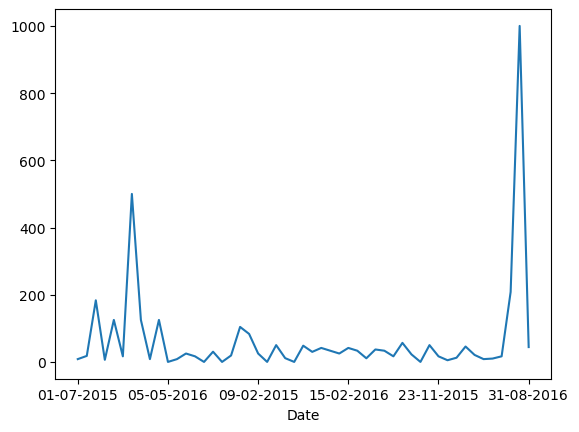

In [295]:
df2[df2['Investors'].str.contains('IDG Ventures')].groupby('Date')['Amount'].sum().plot()